In [1]:
from src import espresso_machine as esma

In [6]:
#Step 1 - Initialize model
model = esma.project(project_id="BN") #Define project
model.set_cores(64) #Define number of prcessing cores
model.get_structure(format='poscar',name="BN.poscar",path='./Research/2D_Materials/Structure/') #Load structure
model.set_pseudo(path='./Research/2D_Materials/PP/PBE/US/')

In [7]:
#Adjust Parameters
model.ecutwfc(70) #Set wavefunction cutoff
model.ecutrho(500) #Set wavefunction cutoff
model.k_points([24,24,1]) #Set number of k points
model.degauss(0.02) #Set degauss value
model.conv_thr(1e-12) #Set convergence threshold
model.ph_thr(1e-16) #Set convergence threshold
model.smearing('fd') #Marzari-Vanderbilt smearing
model.etot_conv_thr(10**-7) #Energy convergence threshold for optimization
model.forc_conv_thr(10**-6) #Force optimization threshold
model.electron_maxstep(500) #Max number of electron iteration
model.exchange_maxstep(500) #Max number of exchange iteration
model.mixing_beta(0.1)      #SCF cycle potential mixing value

model.stress()  #Print stress out
model.force()   #Print forces out

In [8]:
model.make_layer(layer_type='mono')
model.add_vacuum(direction='z',vector=[0,0,10])

In [9]:
model.cell_dof('2Dxy') #Fix cell relaxation to 2D
model.optimize(calculation='vc-relax',max_iter=1)

Starting vc-relax iteration 1 
vc-relax for results is started
vc-relax for results is finished
vc-relax is converged after 1 steps


In [10]:
#Step 4 - Scf calculation
model.calculate('scf')

scf for results is started
scf for results is finished


bands for results is started
bands for results is finished
bands-pp for results is started
bands-pp for results is finished


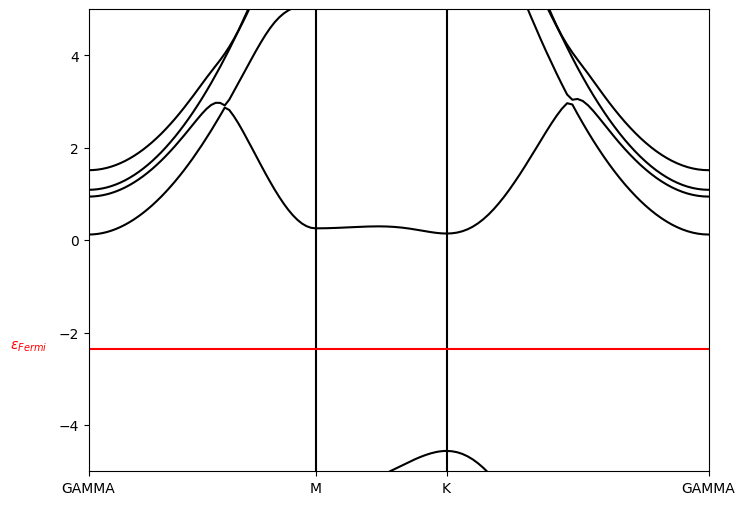

In [19]:
#Step 5 - Bands calculation
path = ['GAMMA','M',"K","GAMMA"] #define corners
model.band_points(path,number=50) #define path
model.calculate('bands')


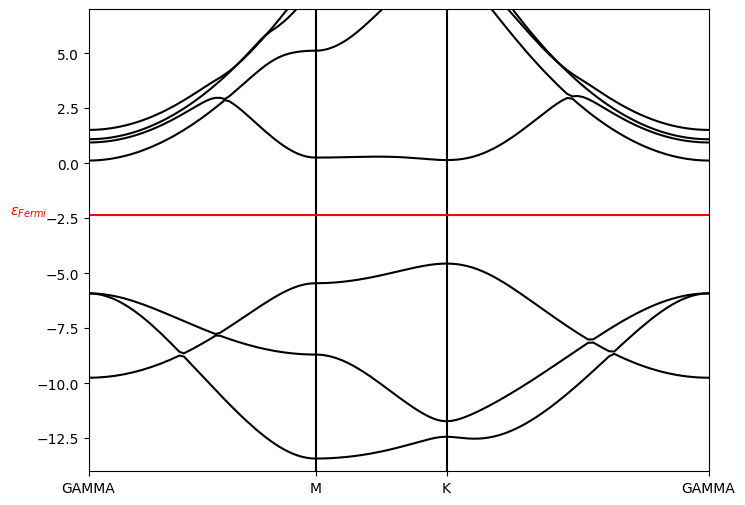

In [25]:
#Step 6 - Plotting
model.plot('electron',ylim=[-14,7],save=True) #plot electron bands

In [11]:
# Step 5 - Run ph.x
model.set_q(nq1=6,nq2=6,nq3=1) #Set parameters
model.calculate('ph')

ph for results is started
ph for results is finished


In [12]:
#Step- 2 - Run q2r.x
model.calculate('q2r') #Run calculation

q2r for results is started
q2r for results is finished


In [17]:
#Step 3 - Run matdyn.x
num_points = 200 # Number of q points
model.calculate("matdyn") #Run calculation

matdyn for results is started
matdyn for results is finished


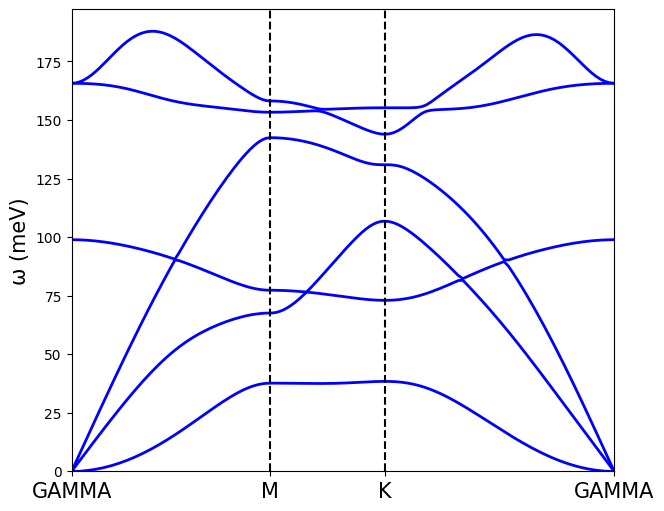

In [18]:
#Step 4 - Plotting
model.plot('phonon',save=True) # Plot phonon band